In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# MobileNet SSD 2017

- Neural network that is only around 28MB.
- Runs on mobile devices. 
- SSD = single-shot detection

In [18]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [19]:
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

model = MobileNet()

In [20]:
from keras.preprocessing import image

img = image.load_img('./data/hotdog/train/hot_dog/1000288.jpg')

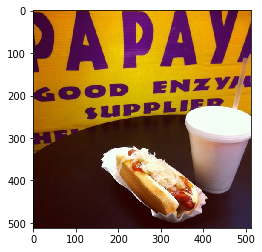

In [21]:
plt.imshow(img)

In [22]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

In [23]:
file = './data/hotdog/train/hot_dog/1000288.jpg'

In [24]:
img_preprocessed = prepare_image(file)

In [25]:
preds = model.predict(img_preprocessed)

In [26]:
decode_predictions(preds)

[[('n07697537', 'hotdog', 0.96916103),
  ('n07880968', 'burrito', 0.02821467),
  ('n12144580', 'corn', 0.0012540875),
  ('n07932039', 'eggnog', 0.00038385272),
  ('n13133613', 'ear', 0.00036552805)]]

# Transfer learning

In [27]:
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

In [28]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [29]:
new_model = Model(inputs=base_model.input,outputs=preds)

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('./data/hotdog/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 998 images belonging to 2 classes.


In [32]:
new_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size


Epoch 1/2
31/31 [==============================] - 341s 11s/step - loss: 0.8796 - acc: 0.5292
Epoch 2/2
31/31 [==============================] - 397s 13s/step - loss: 0.5661 - acc: 0.7026


In [33]:
history = new_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=2)

Epoch 1/2
31/31 [==============================] - 315s 10s/step - loss: 0.3492 - acc: 0.8406
Epoch 2/2
31/31 [==============================] - 309s 10s/step - loss: 0.4123 - acc: 0.8200


In [35]:
history.history['loss']

[0.3553437310315314, 0.410092934811831]

In [36]:
print(history.history.keys())

dict_keys(['loss', 'acc'])
